In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

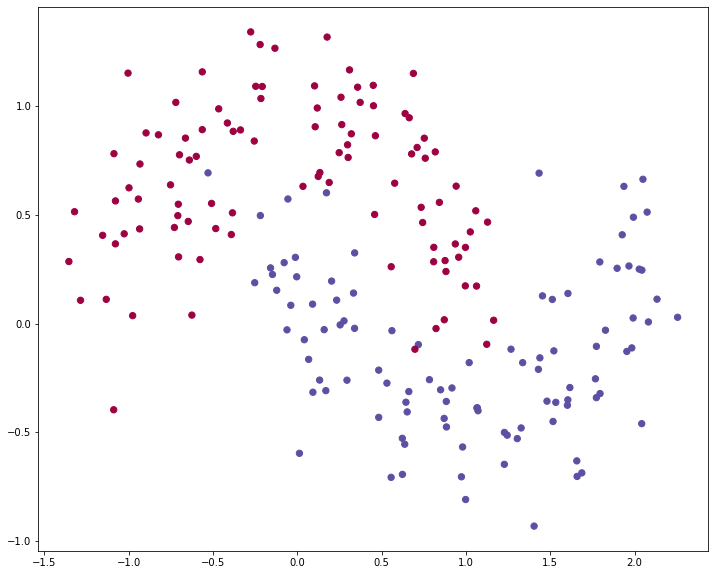

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.rcParams['figure.figsize'] = 12, 10
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
import time
from IPython import display

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [4]:
class Classifier(object):
    """Base class for classifiers."""

    def fit(X, y):
        pass
    
    def predict(X):
        pass


In [10]:
class LogisticRegression(Classifier):
    
    def __init__(self,
                 add_intercept=False,
                 learning_rate=0.01,
                 max_iteration=1000,
                 verbose=0,
                 early_stopping=True,
                 max_iter_without_loss=150,
                 n_classes = None
                ):
        self.add_intercept = add_intercept
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.max_iter_without_loss = max_iter_without_loss
        self.n_classes = n_classes

        
    @staticmethod
    def _sigmoid(x):
        return 1/(1 + np.exp(-x))
    
    @staticmethod
    def _log_loss(y_true, y_pred):
        return - np.mean(y_true*np.log(y_pred) + (1-y_true) * np.log(1 - y_pred))
    
    @staticmethod
    def _softmax(z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
    
    @staticmethod
    def _loss(y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        #return -np.mean(np.log(y_pred[y_true]))

    def _one_hot(self, y, n_labels):
        mat = np.zeros((len(y), n_labels))
        for i, val in enumerate(y):
            mat[i, val] = 1
        return mat
    
    def fit(self, X, y):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1)) 
            X = np.hstack((intercept, X))
            
        y_enc = self._one_hot(y, self.n_classes)
        self.weights = np.zeros((X.shape[1], self.n_classes)) # (number of fearures, number of classess)
        min_loss = np.infty
        #min_loss = 10**6
        n_iter_no_change = 0
        for i in range(self.max_iteration):
            # get preds
            scores = np.dot(X, self.weights)
            predictions = self._softmax(scores)

            # how much did we miss?
            #set_trace()
            loss = self._loss(y_enc, predictions)
            d_loss = y_enc - predictions
            #set_trace()
            if self.verbose:
                if (i % 1) == 0:
                    print(loss)

            # update weights
            self.weights = self.weights + self.learning_rate * np.dot(X.T, d_loss)
            
            #early stopping
            if (loss < min_loss).all():
                min_loss = loss
                n_iter_without_loss = 0
            else:
                n_iter_without_loss += 1
                
                
            if self.early_stopping:
                if n_iter_without_loss == self.max_iter_without_loss:
                    if self.verbose:
                        print(f'Stopped on {i} interation with loss {min_loss}')
                    break

    def predict_proba(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1)) 
            X = np.hstack((intercept, X))
            
        scores = np.dot(X, self.weights)
        predictions = self._softmax(scores)
        return predictions
                    
    def _to_classlabels(self, z):
        return z.argmax(axis=1) 
    
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return self._to_classlabels(probas)

## Мультиклассовая классификация

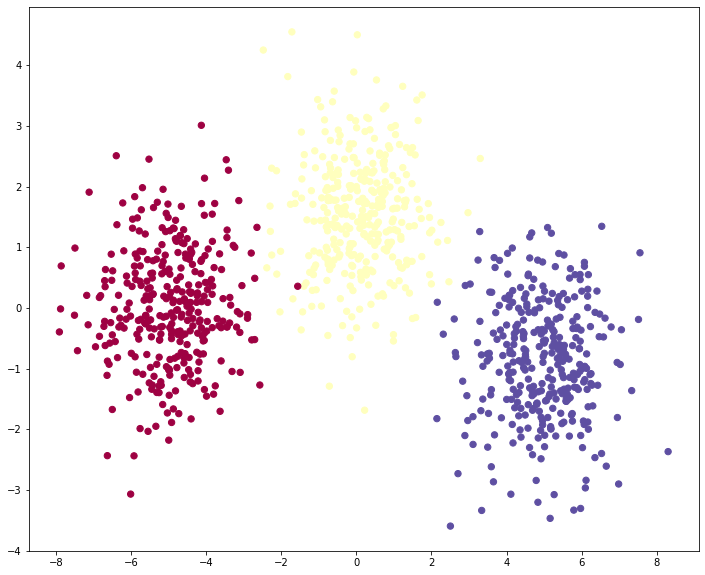

In [11]:
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

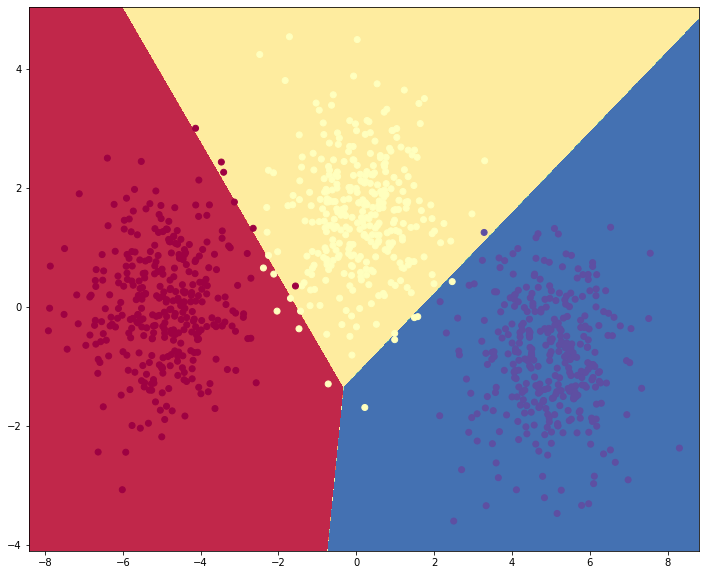

In [12]:
from sklearn.linear_model import LogisticRegression as SkLogisticRegression
lr = SkLogisticRegression(multi_class='ovr') # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)

***1.HW  - Реализовать [softmax](https://en.wikipedia.org/wiki/Softmax_function) регресию для мультиклассовая класификации***

$$ \sigma ({z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}\ \ \ \ {\text{ for }}i=1,\dotsc ,K{\text{ and }}  {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}. $$

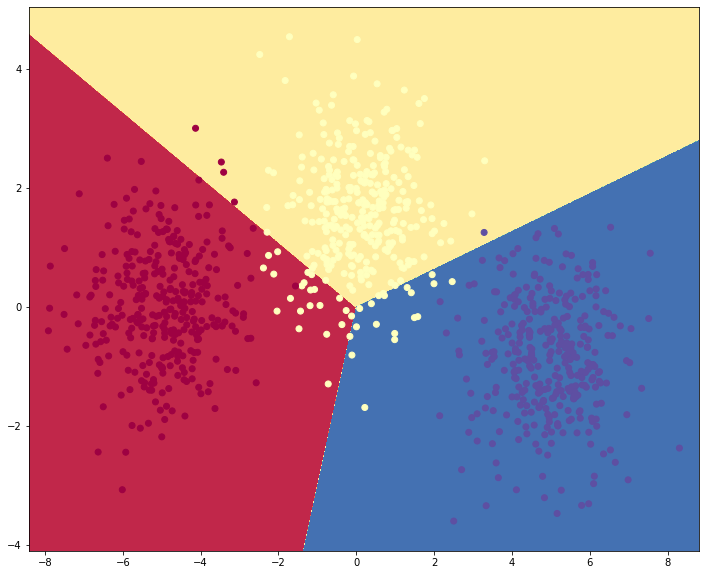

In [13]:
lr = LogisticRegression(n_classes=3,
                        verbose=0,
                        early_stopping=False,
                        max_iter_without_loss=350,
                        learning_rate=0.005,
                        max_iteration=1000,) # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)